PyGSLIB
========

QQ and PP plots
---------------






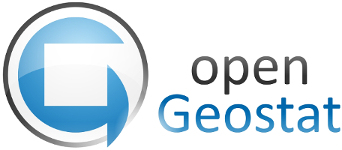

In [1]:
#general imports  
import pygslib


Getting the data ready for work
---------
If the data is in GSLIB format you can use the function `pygslib.gslib.read_gslib_file(filename)` to import the data into a Pandas DataFrame. 


In [2]:
#get the data in gslib format into a pandas Dataframe
cluster= pygslib.gslib.read_gslib_file('../datasets/cluster.dat')  
true= pygslib.gslib.read_gslib_file('../datasets/true.dat')  

true['Declustering Weight'] = 1


## QQ-Plot

In [3]:
npoints = len(cluster['Primary'])
true['Declustering Weight'] = 1


#using declustering wight
parameters_qpplt = {
    # gslib parameters for qq-pp calculation  
    'qqorpp': 0, # integer (Optional, default 0, Q-Q plot). Q-Q plot (qqorpp=0); P-P plot (qqorpp=1)
    #'npts'  : None, # integer (Optional, default min length of va1 and va2). Number of points to use on the Q-Q or P-P plot (should not exceed the smallest number of data in data1 / data2
    'va1'   : cluster['Primary'], # rank-1 array('d') with bounds (nd). Variable 1
    'wt1'   : cluster['Declustering Weight'], # rank-1 array('d') with bounds (nd) (Optional, set to array of ones). Declustering weight for variable 1.  
    'va2'   : true['Primary'], # rank-1 array('d') with bounds (nd). Variable 2
    'wt2'   : true['Declustering Weight'], # rank-1 array('d') with bounds (nd) (Optional, set to array of ones). Declustering weight for variable 2.
    # visual parameters for figure (if a new figure is created)
    #'figure' : None, # a bokeh figure object (Optional: new figure created if None). Set none or undefined if creating a new figure. 
    #'title'  : None, # string (Optional, "QQ plot" or "PP plot"). Figure title
    #'xlabel' : 'Z1', # string (Optional, default "Z1" or "P1"). X axis label 
    #'ylabel' : 'Z2', # string (Optional, default "Z2" or "P2"). Y axis label
    #'xlog' : True, # boolean (Optional, default True). If true plot X axis in log sale.
    #'ylog' : True, # boolean (Optional, default True). If true plot Y axis in log sale.            
    # visual parameter for the probplt
    #'style' : None, # string with valid bokeh chart type 
    'color' : 'black', # string with valid CSS colour (https://www.w3schools.com/colors/colors_names.asp), or an RGB(A) hex value, or tuple of integers (r,g,b), or tuple of (r,g,b,a) (Optional, default "navy")
    'legend': 'Declustered', # string (Optional, default "NA"). 
    #'alpha' : None, # float [0-1] (Optional, default 0.5). Transparency of the fill colour 
    #'lwidth': None, # float (Optional, default 1). Line width
    # leyend
    'legendloc': None} #  float (Optional, default 'bottom_right'). Any of top_left, top_center, top_right, center_right, bottom_right, bottom_center, bottom_left, center_left 

In [4]:
# Calculate the non declustered qq plot    
results, fig = pygslib.plothtml.qpplt(parameters_qpplt)

In [5]:
# Calculate declustered qqplot

# a) get array of ones as weights 
cluster['naive']= cluster['Declustering Weight'].values*0 +1

# update parameter dic
parameters_qpplt['wt1'] = cluster['naive']
parameters_qpplt['color'] = 'blue'
parameters_qpplt['legend']='Clustered'
results, fig = pygslib.plothtml.qpplt(parameters_qpplt)

In [6]:
# show the plot
pygslib.plothtml.show(fig)